# Model Building

# Project: Crude Oil Price Prediction
# Team ID : PNT2022TMID43400

# **8. Save The Model**


# Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Importing Model Building Libraries

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Importing the dataset

In [5]:
data=pd.read_excel("C:/Users/DELL/content/Crude_Oil_Prices_Daily.csv")

# Handling Missing Data

In [6]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [7]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [10]:
data_oil=data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [12]:
data_oil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

# Data Visualisation using matplotlibrary.pyp plotting

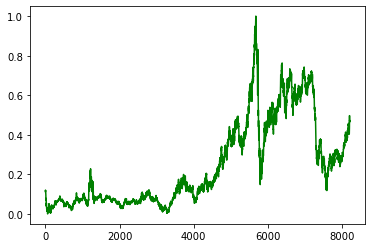

In [13]:
plt.plot(data_oil,'g-')

In [14]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [15]:
training_size,test_size

(5340, 2876)

In [16]:
train_data.shape

(5340, 1)

# Creating A Dataset With Sliding Windows

In [17]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

# Reshape into x=t, t+1, t+2, t+3 and Y=t+4

In [18]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

# Shape of training data

In [19]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

# Shape of test data

In [20]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

# Data of X_train

In [21]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

# Reshape the X_train and X_test

In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# **2. Initailizing the Model**

In [23]:
model=Sequential()

# **3. Adding LSTM Layers**

In [24]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

# **4.Adding Output Layers**

In [25]:
model.add(Dense(3))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 50,953
Trainable params: 50,953
Non-trainable params: 0
_________________________________________________________________


# **5. Configure The Learning Process**

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

# **6. Train the Model**

In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
84/84 [==============================] - 9s 34ms/step - loss: 0.0024 - val_loss: 9.1161e-04
Epoch 2/3
84/84 [==============================] - 1s 17ms/step - loss: 1.3262e-04 - val_loss: 9.4853e-04
Epoch 3/3
84/84 [==============================] - 2s 19ms/step - loss: 1.3061e-04 - val_loss: 0.0014


# **7. Model Evaluation**

In [29]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)

# Calculate RMSE performance metrics

In [30]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

# **8.Save The Model**

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model.save("crude_oil.hs")

INFO:tensorflow:Assets written to: crude_oil.hs\assets


INFO:tensorflow:Assets written to: crude_oil.hs\assets
